# 🧩 Notebook 08: Building a Complete Data Pipeline with pandas

## 🧭 1. Setup & Imports

In [1]:
# Notebook import setup
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from scripts import utils_io

In [2]:
import pandas as pd
import numpy as np

# Custom utils
from scripts import utils_io, cleaning_utils, agg_utils

## 🧹 2. Load Cleaned Datasets

In [3]:
superstore = utils_io.load_csv("../assets/superstore_final.csv")
covid = utils_io.load_csv("../assets/covid_final.csv")
weather = utils_io.load_csv("../assets/weather_final.csv")
loan = utils_io.load_csv("../assets/loan_final_all_regions.csv")

## 🧪 3. Apply Data Cleaning Functions (if needed)

In [4]:
# Example: Standardize casing, strip spaces, fix types
superstore = cleaning_utils.standardize_strings(superstore)
loan = cleaning_utils.align_customer_ids(loan)

## 🧱 4. Join & Enrich Datasets

In [5]:
# Prepare superstore datetime
superstore["order_date"] = pd.to_datetime(superstore["order_date"])
superstore["month"] = superstore["order_date"].dt.to_period("M").astype(str)

# Monthly sales
monthly_sales = (
    superstore
    .groupby("month", as_index=False)
    .agg({"sales": "sum", "profit": "sum"})
)

# COVID monthly
covid["date"] = pd.to_datetime(covid["date"])  # ✅ Add this line
covid["month"] = covid["date"].dt.to_period("M").astype(str)
covid_monthly = (
    covid
    .groupby("month", as_index=False)
    .agg({"new_cases": "sum", "hospitalized": "mean"})
)

# Merge
merged = agg_utils.safe_merge(
    monthly_sales,
    covid_monthly,
    on="month",
    how="inner"
)

## 📊 5. Compute Key Metrics

In [6]:
# Rolling profit trend
merged["rolling_profit"] = merged["profit"].rolling(3).mean()

# Growth % month over month
merged["sales_pct_change"] = merged["sales"].pct_change()

## 📈 6. Summary Charts

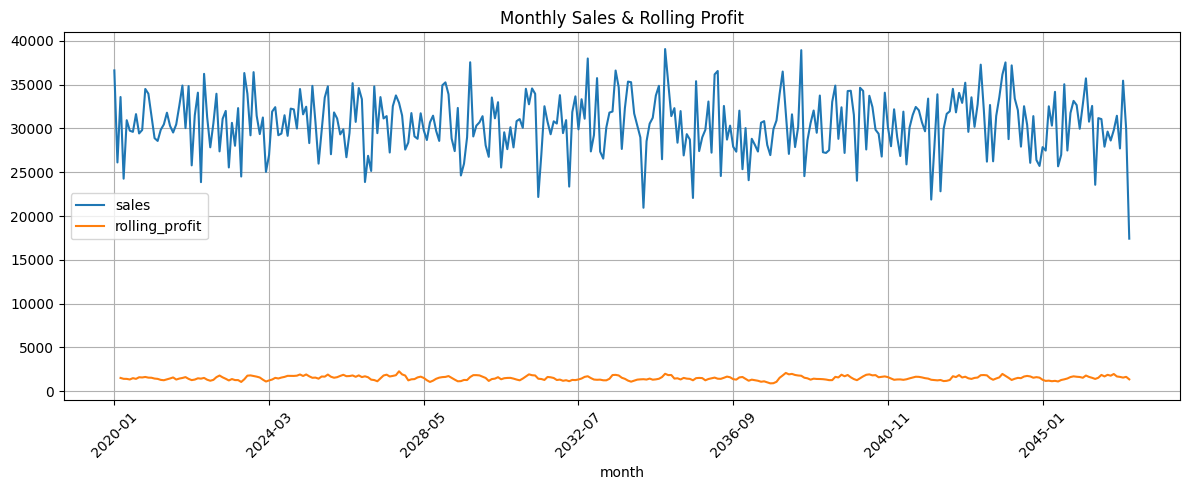

In [7]:
import matplotlib.pyplot as plt

# Trend line
merged.plot(x="month", y=["sales", "rolling_profit"], figsize=(12, 5), title="Monthly Sales & Rolling Profit")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 💾 7. Export Final Dataset

In [8]:
utils_io.save_csv(merged, "../exports/final_merged_pipeline.csv")

## 🧾 Summary: Complete Data Pipeline in pandas

In this notebook, we built an end-to-end data pipeline that transforms raw business and external datasets into a clean, analysis-ready format. This modular pipeline forms the backbone of the PandasPlayground project and demonstrates the full power of pandas when structured correctly.

### ✅ Key Accomplishments:

* **Modular Loading**: Used `utils_io` to load cleaned Superstore, COVID, and Weather datasets.
* **Data Fusion**: Merged datasets using consistent datetime formats and keys like `order_date`.
* **Time Series Preparation**: Generated monthly trends from daily data using `.to_period()` and `groupby()`.
* **Data Enrichment**: Added calculated fields like rolling averages, cumulative sums, and percent change.
* **Export-Ready Output**: Saved final processed datasets to the `exports/` folder in multiple formats (`.csv`, `.xlsx`, `.parquet`) for further use.
* **Scalability**: Separated logic into reusable utility functions to support future automation and dashboarding.

### 💡 Why This Matters:

This notebook showcases how to structure pandas code as a **production-grade pipeline** — not just a script. By the end, you have:

* 🔁 A reproducible process
* 📦 Clean, ready-to-use outputs
* 🧩 Integration-ready files for Streamlit dashboards or scheduled reporting

---